In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
results = []
num_classes = 2
learning_rate = 0.005
samples = 3000
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for batch_size in [256]:
    for hidden_size in [100]:
        for aux_loss_activated in [True]:
            for EPS1 in [0.025]:
                for n in [100000]:
                    for opt in [1]:
                        for t in range(1):
                            train_dataset, test_dataset = ut.load_files(dataset=1)
                            input_size = train_dataset.shape[1]-1
                            train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)
                            if n < 50000:
                                train_dataset = ut.down_sampling(train_dataset)
                                train_dataset = train_dataset.sample(n)
                                print(train_dataset)
                            else: 
                                trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                print('shape: ', trainig_dataset_a.shape[0])
                                n2 = n - trainig_dataset_a.shape[0]
                                print('clase no RR Lrae', n2)
                                trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                            


                            train_dataset = ut.sort_columns(train_dataset)
                            test_dataset = ut.sort_columns(test_dataset)
                            #train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                            test_dataset_pred = test_dataset.copy()
                            train_dataset_pred = train_dataset.copy()

                            try:
                                data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='gaussian')
                                if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                    samples_prior = samples 
                                else: 
                                    samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0] 

                                data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])


                                train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)

                                train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                print(train_dataset_prior.columns)
                                _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                net = Net(input_size, hidden_size, hidden_size, num_classes)
                                net.cuda()

                                hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)
                            except Exception as error:
                                print(error)

    

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28243
clase no RR Lrae 71757
           Amplitude      PeriodLS
Amplitude   0.015676      4.036500
PeriodLS    4.036500  10470.910945
           Amplitude       PeriodLS
Amplitude   0.001897      -2.121053
PeriodLS   -2.121053  353643.741253
(2991, 61)
(2991, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


{'fc1.weight': Parameter containing:
tensor([[-0.1216, -0.0253, -0.0620,  ..., -0.0635, -0.0172, -0.0142],
        [-0.0009,  0.0740,  0.0414,  ..., -0.0388,  0.0627, -0.0103],
        [-0.1228,  0.0421,  0.1236,  ..., -0.0735, -0.0756, -0.0063],
        ...,
        [-0.0505,  0.1162, -0.0782,  ..., -0.0003,  0.1011, -0.0680],
        [-0.0534,  0.1165,  0.0877,  ..., -0.0198,  0.0507, -0.0838],
        [-0.0666, -0.0228, -0.0282,  ..., -0.0681,  0.0579, -0.0940]],
       device='cuda:0', requires_grad=True), 'fc1.bias': Parameter containing:
tensor([-0.0407, -0.0272, -0.0856, -0.0314, -0.0396,  0.0784,  0.0362,  0.0466,
         0.0285, -0.0747, -0.0543, -0.0546, -0.0488,  0.0007,  0.1109, -0.0015,
        -0.0817, -0.0724,  0.0120, -0.1037, -0.0560, -0.0083, -0.0313,  0.0688,
        -0.1168,  0.0401, -0.0505,  0.0337, -0.0443, -0.0740,  0.0815, -0.0001,
        -0.0540, -0.0436,  0.1025,  0.0155, -0.1064,  0.1092,  0.0476, -0.0823,
        -0.1178,  0.1217,  0.1129, -0.0823, -0.102

training: epoch:  1  loss:  106.5745516717434 -- aux loss:  11.977824330329895
training: epoch:  2  loss:  100.66314268112183 -- aux loss:  11.244109094142914
training: epoch:  3  loss:  100.26442876458168 -- aux loss:  12.838330805301666
training: epoch:  4  loss:  100.08599382638931 -- aux loss:  11.040649652481079
training: epoch:  5  loss:  99.84406048059464 -- aux loss:  11.655532658100128
training: epoch:  6  loss:  99.8093393445015 -- aux loss:  9.592676520347595
training: epoch:  7  loss:  99.76512467861176 -- aux loss:  9.254841089248657
training: epoch:  8  loss:  99.84008002281189 -- aux loss:  7.71552774310112
training: epoch:  9  loss:  99.64546951651573 -- aux loss:  6.690716922283173
training: epoch:  10  loss:  99.59021547436714 -- aux loss:  7.279598593711853
the_last_loss:  0.0
running_loss_val:  0.31960269808769226
validating: epoch:  10  loss:  0.31960269808769226
The current loss: 0.31960269808769226
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(4799,

training: epoch:  67  loss:  98.80002024769783 -- aux loss:  6.0507068037986755
training: epoch:  68  loss:  98.76488864421844 -- aux loss:  6.090815603733063
training: epoch:  69  loss:  98.72634974122047 -- aux loss:  6.100799858570099
training: epoch:  70  loss:  98.76803857088089 -- aux loss:  6.100311249494553
the_last_loss:  0.3216460645198822
running_loss_val:  0.318972110748291
validating: epoch:  70  loss:  0.318972110748291
The current loss: 0.318972110748291
the_last_loss: 0.3216460645198822
trigger times: 0
sum mask2 - L1:  tensor(4799, device='cuda:0')
sum mask2 - L2:  tensor(7553, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1201, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2447, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  71  loss:  98.73634424805641 -- aux loss:  6.317110985517502
training: epoch:  72  loss:  98.82881072163582 -- aux loss:  6.239359080791473
training: epoch:  73

training: epoch:  131  loss:  98.59126487374306 -- aux loss:  5.957498997449875
training: epoch:  132  loss:  98.55550339818001 -- aux loss:  5.9900124073028564
training: epoch:  133  loss:  98.59307718276978 -- aux loss:  5.98078978061676
training: epoch:  134  loss:  98.57696014642715 -- aux loss:  6.077257126569748
training: epoch:  135  loss:  98.53463903069496 -- aux loss:  5.9673139452934265
training: epoch:  136  loss:  98.57432520389557 -- aux loss:  6.001410126686096
training: epoch:  137  loss:  98.64039903879166 -- aux loss:  6.027700036764145
training: epoch:  138  loss:  98.56553301215172 -- aux loss:  5.984476029872894
training: epoch:  139  loss:  98.60821375250816 -- aux loss:  5.980088621377945
training: epoch:  140  loss:  98.57712280750275 -- aux loss:  5.991830080747604
the_last_loss:  0.31328505277633667
running_loss_val:  0.31326156854629517
validating: epoch:  140  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31328505277633667

training: epoch:  196  loss:  98.47857803106308 -- aux loss:  5.952664166688919
training: epoch:  197  loss:  98.47192642092705 -- aux loss:  5.957239806652069
training: epoch:  198  loss:  98.46490630507469 -- aux loss:  5.997885525226593
training: epoch:  199  loss:  98.47590017318726 -- aux loss:  5.968931883573532
training: epoch:  200  loss:  98.4529113471508 -- aux loss:  5.963700443506241
the_last_loss:  0.31326159834861755
running_loss_val:  0.31326302886009216
validating: epoch:  200  loss:  0.31326302886009216
The current loss: 0.31326302886009216
the_last_loss: 0.31326159834861755
trigger times: 1
sum mask2 - L1:  tensor(4799, device='cuda:0')
sum mask2 - L2:  tensor(7553, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1201, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2447, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  201  loss:  98.48730847239494 -- aux loss:  5.965388208627701
trainin

training: epoch:  261  loss:  98.4106884598732 -- aux loss:  5.970861583948135
training: epoch:  262  loss:  98.3900680243969 -- aux loss:  5.960706532001495
training: epoch:  263  loss:  98.40554502606392 -- aux loss:  5.979659289121628
training: epoch:  264  loss:  98.45839563012123 -- aux loss:  5.956528276205063
training: epoch:  265  loss:  98.4272069633007 -- aux loss:  5.980670899152756
training: epoch:  266  loss:  98.48130360245705 -- aux loss:  5.971604824066162
training: epoch:  267  loss:  98.42657926678658 -- aux loss:  5.953553527593613
training: epoch:  268  loss:  98.37973108887672 -- aux loss:  5.961686223745346
training: epoch:  269  loss:  98.36567622423172 -- aux loss:  5.963821232318878
training: epoch:  270  loss:  98.39402371644974 -- aux loss:  5.9538863599300385
the_last_loss:  0.313262015581131
running_loss_val:  0.31326159834861755
validating: epoch:  270  loss:  0.31326159834861755
The current loss: 0.31326159834861755
the_last_loss: 0.313262015581131
trigge

training: epoch:  326  loss:  98.35247677564621 -- aux loss:  5.969532072544098
training: epoch:  327  loss:  98.34119465947151 -- aux loss:  5.95813649892807
training: epoch:  328  loss:  98.34936589002609 -- aux loss:  5.975382626056671
training: epoch:  329  loss:  98.349120169878 -- aux loss:  5.9892871379852295
training: epoch:  330  loss:  98.37326946854591 -- aux loss:  6.070532202720642
the_last_loss:  0.31326156854629517
running_loss_val:  0.3132617771625519
validating: epoch:  330  loss:  0.3132617771625519
The current loss: 0.3132617771625519
the_last_loss: 0.31326156854629517
trigger times: 3
sum mask2 - L1:  tensor(4799, device='cuda:0')
sum mask2 - L2:  tensor(7553, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1201, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2447, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  331  loss:  98.38333117961884 -- aux loss:  5.957129418849945
training: e

training: epoch:  391  loss:  98.32730656862259 -- aux loss:  5.961086183786392
training: epoch:  392  loss:  98.32055959105492 -- aux loss:  5.9547527730464935
training: epoch:  393  loss:  98.33827671408653 -- aux loss:  5.953324049711227
training: epoch:  394  loss:  98.35145583748817 -- aux loss:  5.963897347450256
training: epoch:  395  loss:  98.36097797751427 -- aux loss:  5.9642418920993805
training: epoch:  396  loss:  98.39732640981674 -- aux loss:  5.9653215408325195
training: epoch:  397  loss:  98.40136232972145 -- aux loss:  6.005791962146759
training: epoch:  398  loss:  98.34635311365128 -- aux loss:  5.955317825078964
training: epoch:  399  loss:  98.3253542482853 -- aux loss:  5.958499610424042
training: epoch:  400  loss:  98.3184381723404 -- aux loss:  5.9568981528282166
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.3132615685462951

training: epoch:  455  loss:  98.33273747563362 -- aux loss:  5.9520039558410645
training: epoch:  456  loss:  98.30503323674202 -- aux loss:  5.9976217448711395
training: epoch:  457  loss:  98.31804808974266 -- aux loss:  5.9546919465065
training: epoch:  458  loss:  98.32580068707466 -- aux loss:  5.951975226402283
training: epoch:  459  loss:  98.35258701443672 -- aux loss:  5.959286481142044
training: epoch:  460  loss:  98.33893096446991 -- aux loss:  5.951971620321274
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 7
sum mask2 - L1:  tensor(4799, device='cuda:0')
sum mask2 - L2:  tensor(7553, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1201, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2447, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
traini

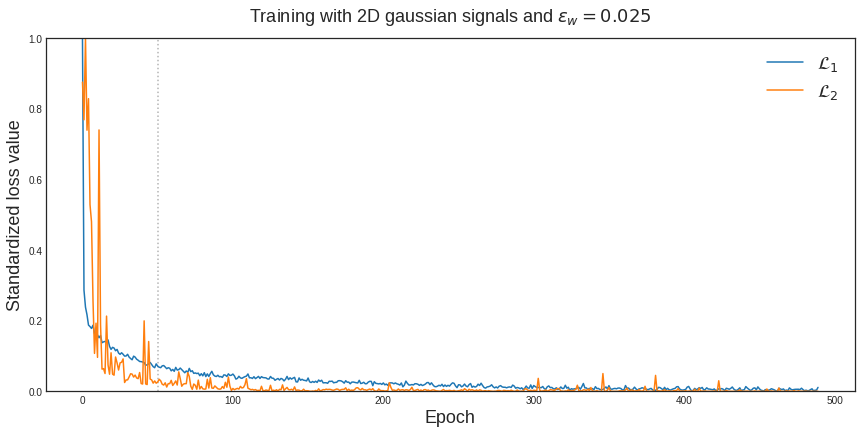

In [2]:
import matplotlib.pyplot as plt
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 6.5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.3)
plt.title('Training with 2D gaussian signals and $\epsilon_w=0.025$', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend(fontsize=18)

In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn


results = []
num_classes = 2

learning_rate = 0.005
samples = 3000

for epsilon in [0.2]:
    for batch_size in [256]:
        for hidden_size in [100]:
            for EPS1 in [0.025]:
                for n in [100000]:
                    for aux_loss_activated in [True]:
                        for opt in [2]:
                            for t in range(1):
                                train_dataset, test_dataset = ut.load_files(dataset=1)
                                input_size = train_dataset.shape[1]-1
                                print('before cleaning outliers')
                                print(train_dataset.shape)
                                print(test_dataset.shape)

                                train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)                                
                                print('after cleaning outliers')
                                print(train_dataset.shape)
                                print(test_dataset.shape)

                                if n < 50000:
                                    train_dataset = ut.down_sampling(train_dataset)
                                    train_dataset = train_dataset.sample(n)
                                    print(train_dataset)
                                else: 
                                    trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                    print('shape: ', trainig_dataset_a.shape[0])
                                    n2 = n - trainig_dataset_a.shape[0]
                                    print('clase no RR Lrae', n2)
                                    trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                    train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                                

                                train_dataset = ut.sort_columns(train_dataset)
                                test_dataset = ut.sort_columns(test_dataset)
                                #... normalize ...
                                
                                #print(train_dataset.columns)
                                test_dataset_pred = test_dataset.copy()
                                train_dataset_pred = train_dataset.copy()
                                try:
                                    data_prior = ut.generate_samples(samples, train_dataset, epsilon,  option = opt)

                                    if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                        samples_prior = samples 
                                    else: 
                                        samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0]
                                    
                                    data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])


                                    train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)
                                    print(data_prior)
                                    train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                    train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                    print(train_dataset_prior.columns)


                                    _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                    _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                    _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                    _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                    _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                    net = Net(input_size, hidden_size, hidden_size, num_classes)
                                    net.cuda()

                                    hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                    EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                except Exception as error:
                                    print(error) 
                                    print(str(epsilon)+"-"+str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
before cleaning outliers
(391501, 61)
(28625, 61)
after cleaning outliers
(373893, 61)
(27293, 61)
shape:  28243
clase no RR Lrae 71757
        PeriodLS  Amplitude  AndersonDarling  Autocor_length  Beyond1Std  \
0      -0.375634  -1.010838        -0.595817       -0.792620   -5.583695   
1      -0.375458  -1.010838        -0.595817       -0.792620   -5.583695   
2      -0.375328  -1.010838        -0.595817       -0.792620   -5.583695   
3      -0.375345  -1.010838        -0.595817       -0.792620   -5.583695   
4      -0.375381  -1.010838        -0.595817       -0.792620   -5.583695   
...          ...        ...              ...             ...         ...   
425485 -0.374518   0.443052        -0.595817        0.313301   -3.600598   
34819  -0.364666  -0.903426         0.369422        0.092117   -0.717359   
405931 -0.315054  -0.308828        -0.509764       -0.129068   -0.125015   
267833 -0.344285  -0

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  106.52539020776749 -- aux loss:  20.12554556131363
training: epoch:  2  loss:  100.81745758652687 -- aux loss:  12.87964352965355
training: epoch:  3  loss:  100.35579493641853 -- aux loss:  11.940582424402237
training: epoch:  4  loss:  100.12586191296577 -- aux loss:  12.018609374761581
training: epoch:  5  loss:  100.04282775521278 -- aux loss:  9.598823130130768
training: epoch:  6  loss:  99.79985225200653 -- aux loss:  12.361313611268997
training: epoch:  7  loss:  99.88198211789131 -- aux loss:  9.509020954370499
training: epoch:  8  loss:  99.81239798665047 -- aux loss:  9.710196256637573
training: epoch:  9  loss:  99.64578652381897 -- aux loss:  9.348864644765854
training: epoch:  10  loss:  99.60235294699669 -- aux loss:  10.452357560396194
the_last_loss:  0.0
running_loss_val:  0.3260069489479065
validating: epoch:  10  loss:  0.3260069489479065
The current loss: 0.3260069489479065
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(4841,

training: epoch:  67  loss:  98.7921923995018 -- aux loss:  9.124497205018997
training: epoch:  68  loss:  98.7790737748146 -- aux loss:  9.103595912456512
training: epoch:  69  loss:  98.818350315094 -- aux loss:  9.096460700035095
training: epoch:  70  loss:  98.81343552470207 -- aux loss:  9.119209706783295
the_last_loss:  1.311581015586853
running_loss_val:  1.0910372734069824
validating: epoch:  70  loss:  1.0910372734069824
The current loss: 1.0910372734069824
the_last_loss: 1.311581015586853
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  71  loss:  98.84872478246689 -- aux loss:  9.27871772646904
training: epoch:  72  loss:  98.79395321011543 -- aux loss:  9.228257179260254
training: epoch:  73  los

training: epoch:  131  loss:  98.61433482170105 -- aux loss:  9.086392372846603
training: epoch:  132  loss:  98.59839141368866 -- aux loss:  9.08525013923645
training: epoch:  133  loss:  98.6059350669384 -- aux loss:  9.086001425981522
training: epoch:  134  loss:  98.56730231642723 -- aux loss:  9.101576745510101
training: epoch:  135  loss:  98.57416439056396 -- aux loss:  9.085371881723404
training: epoch:  136  loss:  98.635098695755 -- aux loss:  9.10017305612564
training: epoch:  137  loss:  98.5782645046711 -- aux loss:  9.088138729333878
training: epoch:  138  loss:  98.58323833346367 -- aux loss:  9.09006655216217
training: epoch:  139  loss:  98.61340394616127 -- aux loss:  9.085313528776169
training: epoch:  140  loss:  98.59046432375908 -- aux loss:  9.104655772447586
the_last_loss:  0.4426180124282837
running_loss_val:  0.32528024911880493
validating: epoch:  140  loss:  0.32528024911880493
The current loss: 0.32528024911880493
the_last_loss: 0.4426180124282837
trigger t

training: epoch:  196  loss:  98.57441571354866 -- aux loss:  9.096250206232071
training: epoch:  197  loss:  98.53670582175255 -- aux loss:  9.089894652366638
training: epoch:  198  loss:  98.47940164804459 -- aux loss:  9.084636777639389
training: epoch:  199  loss:  98.50920501351357 -- aux loss:  9.106183350086212
training: epoch:  200  loss:  98.49274417757988 -- aux loss:  9.120073020458221
the_last_loss:  0.3132617175579071
running_loss_val:  0.3132616877555847
validating: epoch:  200  loss:  0.3132616877555847
The current loss: 0.3132616877555847
the_last_loss: 0.3132617175579071
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  201  loss:  98.46937105059624 -- aux loss:  9.086696684360504
training: e

training: epoch:  261  loss:  98.44570365548134 -- aux loss:  9.084587961435318
training: epoch:  262  loss:  98.4853401184082 -- aux loss:  9.416470885276794
training: epoch:  263  loss:  98.4664540886879 -- aux loss:  9.084587514400482
training: epoch:  264  loss:  98.46304285526276 -- aux loss:  9.152737349271774
training: epoch:  265  loss:  98.44622021913528 -- aux loss:  9.084587216377258
training: epoch:  266  loss:  98.50740191340446 -- aux loss:  9.08458736538887
training: epoch:  267  loss:  98.46226820349693 -- aux loss:  9.084587216377258
training: epoch:  268  loss:  98.43170776963234 -- aux loss:  9.084587216377258
training: epoch:  269  loss:  98.44902321696281 -- aux loss:  9.084587216377258
training: epoch:  270  loss:  98.46705114841461 -- aux loss:  9.580354988574982
the_last_loss:  0.33087000250816345
running_loss_val:  1.1998746395111084
validating: epoch:  270  loss:  1.1998746395111084
The current loss: 1.1998746395111084
the_last_loss: 0.33087000250816345
trigge

training: epoch:  326  loss:  98.46152454614639 -- aux loss:  9.72127452492714
training: epoch:  327  loss:  98.43025928735733 -- aux loss:  9.09704464673996
training: epoch:  328  loss:  98.46800738573074 -- aux loss:  9.089495837688446
training: epoch:  329  loss:  98.4657271206379 -- aux loss:  9.084597945213318
training: epoch:  330  loss:  98.43213674426079 -- aux loss:  9.08459421992302
the_last_loss:  0.6529257893562317
running_loss_val:  0.31422507762908936
validating: epoch:  330  loss:  0.31422507762908936
The current loss: 0.31422507762908936
the_last_loss: 0.6529257893562317
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  331  loss:  98.43470805883408 -- aux loss:  9.086145401000977
training: ep

training: epoch:  391  loss:  98.44272366166115 -- aux loss:  9.098107159137726
training: epoch:  392  loss:  98.43302530050278 -- aux loss:  9.092349410057068
training: epoch:  393  loss:  98.39538383483887 -- aux loss:  9.086098909378052
training: epoch:  394  loss:  98.4357380270958 -- aux loss:  9.084593743085861
training: epoch:  395  loss:  98.4596574306488 -- aux loss:  9.086561352014542
training: epoch:  396  loss:  98.40482091903687 -- aux loss:  9.084588021039963
training: epoch:  397  loss:  98.39343771338463 -- aux loss:  9.08458748459816
training: epoch:  398  loss:  98.38565272092819 -- aux loss:  9.084589034318924
training: epoch:  399  loss:  98.41929653286934 -- aux loss:  9.084942996501923
training: epoch:  400  loss:  98.39382547140121 -- aux loss:  9.092494010925293
the_last_loss:  1.202150583267212
running_loss_val:  1.0896121263504028
validating: epoch:  400  loss:  1.0896121263504028
The current loss: 1.0896121263504028
the_last_loss: 1.202150583267212
trigger ti

training: epoch:  456  loss:  98.41621518135071 -- aux loss:  9.091749221086502
training: epoch:  457  loss:  98.376490265131 -- aux loss:  9.084587782621384
training: epoch:  458  loss:  98.38375896215439 -- aux loss:  9.084629356861115
training: epoch:  459  loss:  98.4409428536892 -- aux loss:  9.304299890995026
training: epoch:  460  loss:  98.42201578617096 -- aux loss:  9.647733122110367
the_last_loss:  0.31326162815093994
running_loss_val:  0.4243786036968231
validating: epoch:  460  loss:  0.4243786036968231
The current loss: 0.4243786036968231
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  461  loss:  98.38520821928978 -- aux loss:  9.135681211948395
training: ep

training: epoch:  521  loss:  98.38265487551689 -- aux loss:  9.096202403306961
training: epoch:  522  loss:  98.36642062664032 -- aux loss:  9.098343044519424
training: epoch:  523  loss:  98.39084213972092 -- aux loss:  9.092399299144745
training: epoch:  524  loss:  98.35349887609482 -- aux loss:  9.629201859235764
training: epoch:  525  loss:  98.36243626475334 -- aux loss:  9.088482975959778
training: epoch:  526  loss:  98.35839739441872 -- aux loss:  9.084587275981903
training: epoch:  527  loss:  98.38188216090202 -- aux loss:  9.085308343172073
training: epoch:  528  loss:  98.38115999102592 -- aux loss:  9.09376311302185
training: epoch:  529  loss:  98.3727256655693 -- aux loss:  9.08472889661789
training: epoch:  530  loss:  98.39846563339233 -- aux loss:  9.08877843618393
the_last_loss:  0.3132616877555847
running_loss_val:  0.32287946343421936
validating: epoch:  530  loss:  0.32287946343421936
The current loss: 0.32287946343421936
the_last_loss: 0.3132616877555847
trigge

training: epoch:  586  loss:  98.33811220526695 -- aux loss:  9.08458948135376
training: epoch:  587  loss:  98.39012962579727 -- aux loss:  9.084587305784225
training: epoch:  588  loss:  98.35832959413528 -- aux loss:  9.153908550739288
training: epoch:  589  loss:  98.35983541607857 -- aux loss:  9.091146558523178
training: epoch:  590  loss:  98.34743565320969 -- aux loss:  9.092395663261414
the_last_loss:  1.202150583267212
running_loss_val:  0.31326162815093994
validating: epoch:  590  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.202150583267212
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  591  loss:  98.35383546352386 -- aux loss:  9.56086391210556
training: ep

training: epoch:  651  loss:  98.32930561900139 -- aux loss:  9.084587216377258
training: epoch:  652  loss:  98.34144926071167 -- aux loss:  9.084587216377258
training: epoch:  653  loss:  98.32948958873749 -- aux loss:  9.084587216377258
training: epoch:  654  loss:  98.31517884135246 -- aux loss:  9.085820138454437
training: epoch:  655  loss:  98.33708813786507 -- aux loss:  9.084636747837067
training: epoch:  656  loss:  98.39673325419426 -- aux loss:  9.090886920690536
training: epoch:  657  loss:  98.39430546760559 -- aux loss:  9.084587216377258
training: epoch:  658  loss:  98.33464390039444 -- aux loss:  9.084587216377258
training: epoch:  659  loss:  98.35430732369423 -- aux loss:  9.084587216377258
training: epoch:  660  loss:  98.38012877106667 -- aux loss:  9.084587216377258
the_last_loss:  0.3132622539997101
running_loss_val:  1.31326162815094
validating: epoch:  660  loss:  1.31326162815094
The current loss: 1.31326162815094
the_last_loss: 0.3132622539997101
trigger tim

training: epoch:  716  loss:  98.33401164412498 -- aux loss:  9.084931135177612
training: epoch:  717  loss:  98.34831127524376 -- aux loss:  9.086141854524612
training: epoch:  718  loss:  98.3533287346363 -- aux loss:  9.085989713668823
training: epoch:  719  loss:  98.33240976929665 -- aux loss:  9.085034132003784
training: epoch:  720  loss:  98.33295115828514 -- aux loss:  9.955165356397629
the_last_loss:  1.31326162815094
running_loss_val:  0.345816969871521
validating: epoch:  720  loss:  0.345816969871521
The current loss: 0.345816969871521
the_last_loss: 1.31326162815094
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  721  loss:  98.33486324548721 -- aux loss:  9.084593743085861
training: epoch:  7

training: epoch:  781  loss:  98.34516325592995 -- aux loss:  9.084587723016739
training: epoch:  782  loss:  98.32948884367943 -- aux loss:  9.26060375571251
training: epoch:  783  loss:  98.3556516468525 -- aux loss:  9.084587216377258
training: epoch:  784  loss:  98.32351970672607 -- aux loss:  9.084587216377258
training: epoch:  785  loss:  98.32574731111526 -- aux loss:  9.084587216377258
training: epoch:  786  loss:  98.34060010313988 -- aux loss:  10.053337097167969
training: epoch:  787  loss:  98.37565425038338 -- aux loss:  9.084587454795837
training: epoch:  788  loss:  98.34000757336617 -- aux loss:  9.084587216377258
training: epoch:  789  loss:  98.34071934223175 -- aux loss:  9.084651917219162
training: epoch:  790  loss:  98.35041770339012 -- aux loss:  9.084634184837341
the_last_loss:  0.5244357585906982
running_loss_val:  1.31326162815094
validating: epoch:  790  loss:  1.31326162815094
The current loss: 1.31326162815094
the_last_loss: 0.5244357585906982
trigger time

training: epoch:  846  loss:  98.32162117958069 -- aux loss:  9.084587216377258
training: epoch:  847  loss:  98.32923251390457 -- aux loss:  9.086060553789139
training: epoch:  848  loss:  98.32783222198486 -- aux loss:  9.948240637779236
training: epoch:  849  loss:  98.34746739268303 -- aux loss:  9.08458724617958
training: epoch:  850  loss:  98.3367828130722 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  1.31326162815094
validating: epoch:  850  loss:  1.31326162815094
The current loss: 1.31326162815094
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  851  loss:  98.3213737308979 -- aux loss:  9.084587216377258
training: epoch:  

training: epoch:  911  loss:  98.34061685204506 -- aux loss:  9.087256610393524
training: epoch:  912  loss:  98.31094285845757 -- aux loss:  9.086065351963043
training: epoch:  913  loss:  98.3097431063652 -- aux loss:  9.153941243886948
training: epoch:  914  loss:  98.3388179242611 -- aux loss:  9.084587216377258
training: epoch:  915  loss:  98.33482548594475 -- aux loss:  9.084587514400482
training: epoch:  916  loss:  98.35609439015388 -- aux loss:  9.836467266082764
training: epoch:  917  loss:  98.31899070739746 -- aux loss:  9.084587216377258
training: epoch:  918  loss:  98.32616049051285 -- aux loss:  9.084587216377258
training: epoch:  919  loss:  98.29971888661385 -- aux loss:  9.084587216377258
training: epoch:  920  loss:  98.3272585272789 -- aux loss:  9.084587216377258
the_last_loss:  0.9773961305618286
running_loss_val:  1.31326162815094
validating: epoch:  920  loss:  1.31326162815094
The current loss: 1.31326162815094
the_last_loss: 0.9773961305618286
trigger times:

training: epoch:  976  loss:  98.3256022632122 -- aux loss:  9.087560623884201
training: epoch:  977  loss:  98.32850721478462 -- aux loss:  9.084602534770966
training: epoch:  978  loss:  98.3289685845375 -- aux loss:  9.084587216377258
training: epoch:  979  loss:  98.32523757219315 -- aux loss:  9.084587216377258
training: epoch:  980  loss:  98.31723517179489 -- aux loss:  9.084587216377258
the_last_loss:  0.3133717179298401
running_loss_val:  0.31326353549957275
validating: epoch:  980  loss:  0.31326353549957275
The current loss: 0.31326353549957275
the_last_loss: 0.3133717179298401
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  981  loss:  98.3162350654602 -- aux loss:  9.086071103811264
training: e

training: epoch:  1040  loss:  98.30598032474518 -- aux loss:  9.966482639312744
the_last_loss:  0.31326162815093994
running_loss_val:  0.8688027858734131
validating: epoch:  1040  loss:  0.8688027858734131
The current loss: 0.8688027858734131
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  1041  loss:  98.33812060952187 -- aux loss:  9.084642678499222
training: epoch:  1042  loss:  98.32381919026375 -- aux loss:  9.086221396923065
training: epoch:  1043  loss:  98.30430415272713 -- aux loss:  9.088493466377258
training: epoch:  1044  loss:  98.32552227377892 -- aux loss:  9.620496243238449
training: epoch:  1045  loss:  98.30281847715378 -- aux loss:  9.085930317640305
tr

training: epoch:  1101  loss:  98.30937391519547 -- aux loss:  9.084587216377258
training: epoch:  1102  loss:  98.33244404196739 -- aux loss:  9.238663077354431
training: epoch:  1103  loss:  98.3027857542038 -- aux loss:  9.086108267307281
training: epoch:  1104  loss:  98.30205550789833 -- aux loss:  9.084587216377258
training: epoch:  1105  loss:  98.30505421757698 -- aux loss:  9.250315964221954
training: epoch:  1106  loss:  98.3169686794281 -- aux loss:  9.084587216377258
training: epoch:  1107  loss:  98.32629451155663 -- aux loss:  9.084587216377258
training: epoch:  1108  loss:  98.32900047302246 -- aux loss:  9.08467248082161
training: epoch:  1109  loss:  98.30663326382637 -- aux loss:  9.084974527359009
training: epoch:  1110  loss:  98.30072817206383 -- aux loss:  9.273485958576202
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  1110  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.3132616281

training: epoch:  1165  loss:  98.33611398935318 -- aux loss:  9.08458748459816
training: epoch:  1166  loss:  98.29151821136475 -- aux loss:  9.084589928388596
training: epoch:  1167  loss:  98.29314041137695 -- aux loss:  9.084587216377258
training: epoch:  1168  loss:  98.28962749242783 -- aux loss:  9.084589123725891
training: epoch:  1169  loss:  98.30574640631676 -- aux loss:  9.584365367889404
training: epoch:  1170  loss:  98.28546085953712 -- aux loss:  9.084589928388596
the_last_loss:  0.3132617771625519
running_loss_val:  0.31326162815093994
validating: epoch:  1170  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.3132617771625519
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
tr

training: epoch:  1229  loss:  98.32509854435921 -- aux loss:  9.088493466377258
training: epoch:  1230  loss:  98.30931657552719 -- aux loss:  9.190247148275375
the_last_loss:  1.202150583267212
running_loss_val:  0.31326162815093994
validating: epoch:  1230  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.202150583267212
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  1231  loss:  98.32745283842087 -- aux loss:  9.086071133613586
training: epoch:  1232  loss:  98.31932598352432 -- aux loss:  9.115837216377258
training: epoch:  1233  loss:  98.29428851604462 -- aux loss:  9.084587216377258
training: epoch:  1234  loss:  98.29286289215088 -- aux loss:  9.084587216377258
tra

training: epoch:  1291  loss:  98.28218191862106 -- aux loss:  9.093879401683807
training: epoch:  1292  loss:  98.3357250392437 -- aux loss:  9.096305817365646
training: epoch:  1293  loss:  98.28591731190681 -- aux loss:  9.093890488147736
training: epoch:  1294  loss:  98.29193264245987 -- aux loss:  9.08850023150444
training: epoch:  1295  loss:  98.30595809221268 -- aux loss:  9.093883842229843
training: epoch:  1296  loss:  98.29643270373344 -- aux loss:  9.088493466377258
training: epoch:  1297  loss:  98.28393310308456 -- aux loss:  9.092399716377258
training: epoch:  1298  loss:  98.32099509239197 -- aux loss:  9.092461884021759
training: epoch:  1299  loss:  98.30750775337219 -- aux loss:  9.092397898435593
training: epoch:  1300  loss:  98.32693228125572 -- aux loss:  9.08950650691986
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  1300  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.3132616281

training: epoch:  1355  loss:  98.33215418457985 -- aux loss:  9.09223547577858
training: epoch:  1356  loss:  98.28841769695282 -- aux loss:  9.089937299489975
training: epoch:  1357  loss:  98.28988519310951 -- aux loss:  9.64708697795868
training: epoch:  1358  loss:  98.3262782394886 -- aux loss:  9.084587216377258
training: epoch:  1359  loss:  98.29667916893959 -- aux loss:  9.308491885662079
training: epoch:  1360  loss:  98.28310880064964 -- aux loss:  9.084587633609772
the_last_loss:  1.2021498680114746
running_loss_val:  0.979771614074707
validating: epoch:  1360  loss:  0.979771614074707
The current loss: 0.979771614074707
the_last_loss: 1.2021498680114746
trigger times: 0
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: 

training: epoch:  1419  loss:  98.28182053565979 -- aux loss:  9.08606642484665
training: epoch:  1420  loss:  98.29386392235756 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  1420  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4841, device='cuda:0')
sum mask2 - L2:  tensor(7520, device='cuda:0')
sum mask2 - L3:  tensor(152, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1159, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2480, device='cuda:0')
sum mask1 - L3 (aux):  tensor(48, device='cuda:0')
training: epoch:  1421  loss:  98.29736575484276 -- aux loss:  9.086893320083618
training: epoch:  1422  loss:  98.27661073207855 -- aux loss:  9.089700549840927
training: epoch:  1423  loss:  98.27243277430534 -- aux loss:  9.094507843255997
training: epoch:  1424  loss:  98.32745516300201 -- aux loss:  9.086071163415909


training: epoch:  1481  loss:  98.30724343657494 -- aux loss:  9.088493466377258
training: epoch:  1482  loss:  98.27965787053108 -- aux loss:  9.084632128477097
training: epoch:  1483  loss:  98.29381102323532 -- aux loss:  9.085846662521362
training: epoch:  1484  loss:  98.27702271938324 -- aux loss:  9.086071163415909
training: epoch:  1485  loss:  98.28230094909668 -- aux loss:  9.330614596605301
training: epoch:  1486  loss:  98.28453141450882 -- aux loss:  9.084587216377258
training: epoch:  1487  loss:  98.27439057826996 -- aux loss:  9.084587216377258
training: epoch:  1488  loss:  98.28728631138802 -- aux loss:  9.300005078315735
training: epoch:  1489  loss:  98.291538387537 -- aux loss:  9.084587216377258
training: epoch:  1490  loss:  98.27610540390015 -- aux loss:  9.084587216377258
the_last_loss:  0.9799283146858215
running_loss_val:  0.4622635245323181
validating: epoch:  1490  loss:  0.4622635245323181
The current loss: 0.4622635245323181
the_last_loss: 0.9799283146858

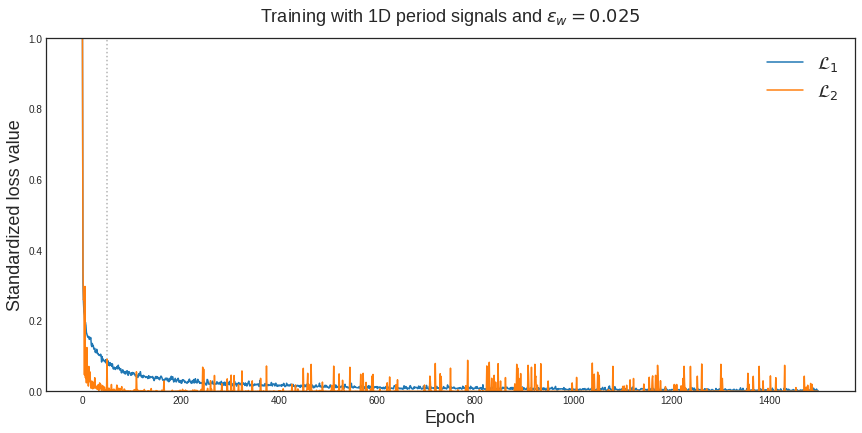

In [4]:
import matplotlib.pyplot as plt
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 6.5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.3)
plt.title('Training with 1D period signals and $\epsilon_w=0.025$', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend(fontsize=18)

In [5]:


results = []
num_classes = 2

learning_rate = 0.005
samples = 3000

for epsilon in [0.2]:
    for batch_size in [256]:
        for hidden_size in [100]:
            for EPS1 in [0.025]:
                for n in [100000]:
                    for aux_loss_activated in [True]:
                        for opt in [2]:
                            for t in range(1):
                                train_dataset, test_dataset = ut.load_files(dataset=1)
                                input_size = train_dataset.shape[1]-1
                                train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)                                
                                if n < 50000:
                                    train_dataset = ut.down_sampling(train_dataset)
                                    train_dataset = train_dataset.sample(n)
                                    print(train_dataset)
                                else: 
                                    trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                    print('shape: ', trainig_dataset_a.shape[0])
                                    n2 = n - trainig_dataset_a.shape[0]
                                    print('clase no RR Lrae', n2)
                                    trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                    train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                                                                
                                train_dataset = ut.sort_columns(train_dataset)
                                test_dataset = ut.sort_columns(test_dataset)
                                #train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                                test_dataset_pred = test_dataset.copy()
                                train_dataset_pred = train_dataset.copy()
                                try:
                                    data_prior = ut.generate_samples(samples, train_dataset, epsilon,  option = opt,  DRs={'feature':'Amplitude', 'up': 0.8, 'lp': 0.2})
                                    
                                    if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                        samples_prior = samples 
                                    else: 
                                        samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0]
                                    
                                    data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])

                                    train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)

                                    train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                    train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                    print(train_dataset_prior.columns)
                                    _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                    _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                    _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                    _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                    _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                    net = Net(input_size, hidden_size, hidden_size, num_classes)
                                    net.cuda()

                                    hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                    EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                except Exception as error:
                                    print(error) 
                                    print(str(epsilon)+"-"+str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28243
clase no RR Lrae 71757
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitu

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  106.41386958956718 -- aux loss:  19.342449069023132
training: epoch:  2  loss:  100.66879630088806 -- aux loss:  18.769920468330383
training: epoch:  3  loss:  100.29291495680809 -- aux loss:  16.571429908275604
training: epoch:  4  loss:  100.17591327428818 -- aux loss:  11.037471562623978
training: epoch:  5  loss:  99.99536338448524 -- aux loss:  10.492943197488785
training: epoch:  6  loss:  99.88677904009819 -- aux loss:  9.658905804157257
training: epoch:  7  loss:  99.81611621379852 -- aux loss:  9.440122902393341
training: epoch:  8  loss:  99.75230547785759 -- aux loss:  9.688882946968079
training: epoch:  9  loss:  99.70663920044899 -- aux loss:  9.652507454156876
training: epoch:  10  loss:  99.70705953240395 -- aux loss:  9.46267119050026
the_last_loss:  0.0
running_loss_val:  0.32011884450912476
validating: epoch:  10  loss:  0.32011884450912476
The current loss: 0.32011884450912476
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(483

training: epoch:  67  loss:  98.83396071195602 -- aux loss:  9.163957178592682
training: epoch:  68  loss:  98.84182885289192 -- aux loss:  9.181231439113617
training: epoch:  69  loss:  98.86900123953819 -- aux loss:  9.124602168798447
training: epoch:  70  loss:  98.84424713253975 -- aux loss:  9.11130154132843
the_last_loss:  1.0233081579208374
running_loss_val:  0.6445199847221375
validating: epoch:  70  loss:  0.6445199847221375
The current loss: 0.6445199847221375
the_last_loss: 1.0233081579208374
trigger times: 0
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  71  loss:  98.81267940998077 -- aux loss:  9.845262348651886
training: epoch:  72  loss:  98.77943551540375 -- aux loss:  9.096782833337784
training: epoch:  7

training: epoch:  131  loss:  98.50967875123024 -- aux loss:  9.089280515909195
training: epoch:  132  loss:  98.53878712654114 -- aux loss:  9.104098200798035
training: epoch:  133  loss:  98.45771458745003 -- aux loss:  9.100013971328735
training: epoch:  134  loss:  98.53267654776573 -- aux loss:  9.092833757400513
training: epoch:  135  loss:  98.52823939919472 -- aux loss:  9.100230664014816
training: epoch:  136  loss:  98.56196668744087 -- aux loss:  9.452193170785904
training: epoch:  137  loss:  98.51514276862144 -- aux loss:  9.092395693063736
training: epoch:  138  loss:  98.5413485467434 -- aux loss:  9.098729759454727
training: epoch:  139  loss:  98.58517131209373 -- aux loss:  9.088633120059967
training: epoch:  140  loss:  98.54006099700928 -- aux loss:  9.094823956489563
the_last_loss:  0.8702466487884521
running_loss_val:  1.1181689500808716
validating: epoch:  140  loss:  1.1181689500808716
The current loss: 1.1181689500808716
the_last_loss: 0.8702466487884521
trigge

training: epoch:  196  loss:  98.42780843377113 -- aux loss:  9.110147893428802
training: epoch:  197  loss:  98.47111761569977 -- aux loss:  9.091518878936768
training: epoch:  198  loss:  98.44484123587608 -- aux loss:  9.292960077524185
training: epoch:  199  loss:  98.47126537561417 -- aux loss:  9.187187254428864
training: epoch:  200  loss:  98.451091080904 -- aux loss:  9.127900630235672
the_last_loss:  0.8687640428543091
running_loss_val:  0.533266007900238
validating: epoch:  200  loss:  0.533266007900238
The current loss: 0.533266007900238
the_last_loss: 0.8687640428543091
trigger times: 0
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  201  loss:  98.48763927817345 -- aux loss:  9.109500288963318
training: epoch:

training: epoch:  261  loss:  98.43210113048553 -- aux loss:  9.238089710474014
training: epoch:  262  loss:  98.42811712622643 -- aux loss:  9.084645599126816
training: epoch:  263  loss:  98.38679340481758 -- aux loss:  9.088472753763199
training: epoch:  264  loss:  98.39802291989326 -- aux loss:  9.084587424993515
training: epoch:  265  loss:  98.40286186337471 -- aux loss:  9.086130321025848
training: epoch:  266  loss:  98.40092355012894 -- aux loss:  9.084587335586548
training: epoch:  267  loss:  98.4270706474781 -- aux loss:  9.093937188386917
training: epoch:  268  loss:  98.41290643811226 -- aux loss:  9.084753096103668
training: epoch:  269  loss:  98.43814072012901 -- aux loss:  9.084708034992218
training: epoch:  270  loss:  98.4400691986084 -- aux loss:  9.122149854898453
the_last_loss:  0.3133074939250946
running_loss_val:  1.1436549425125122
validating: epoch:  270  loss:  1.1436549425125122
The current loss: 1.1436549425125122
the_last_loss: 0.3133074939250946
trigger

training: epoch:  326  loss:  98.37905582785606 -- aux loss:  9.090477496385574
training: epoch:  327  loss:  98.3757472038269 -- aux loss:  9.094509273767471
training: epoch:  328  loss:  98.37798789143562 -- aux loss:  9.185844630002975
training: epoch:  329  loss:  98.39759916067123 -- aux loss:  9.100795656442642
training: epoch:  330  loss:  98.44120752811432 -- aux loss:  9.167354851961136
the_last_loss:  0.31326162815093994
running_loss_val:  0.8688170909881592
validating: epoch:  330  loss:  0.8688170909881592
The current loss: 0.8688170909881592
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  331  loss:  98.39733442664146 -- aux loss:  9.093845278024673
training: 

training: epoch:  391  loss:  98.37327665090561 -- aux loss:  9.084590643644333
training: epoch:  392  loss:  98.37548372149467 -- aux loss:  9.266246348619461
training: epoch:  393  loss:  98.36898422241211 -- aux loss:  9.166403472423553
training: epoch:  394  loss:  98.37936210632324 -- aux loss:  9.084761321544647
training: epoch:  395  loss:  98.42843067646027 -- aux loss:  9.08458998799324
training: epoch:  396  loss:  98.36768659949303 -- aux loss:  9.115839183330536
training: epoch:  397  loss:  98.35439050197601 -- aux loss:  9.08467036485672
training: epoch:  398  loss:  98.3465556204319 -- aux loss:  9.122236728668213
training: epoch:  399  loss:  98.36024796962738 -- aux loss:  9.084618628025055
training: epoch:  400  loss:  98.35293266177177 -- aux loss:  9.086059212684631
the_last_loss:  0.49310410022735596
running_loss_val:  0.31326162815093994
validating: epoch:  400  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.49310410022735596
tri

training: epoch:  456  loss:  98.33814325928688 -- aux loss:  9.125559508800507
training: epoch:  457  loss:  98.33943119645119 -- aux loss:  9.161212354898453
training: epoch:  458  loss:  98.33865416049957 -- aux loss:  9.084587216377258
training: epoch:  459  loss:  98.34161278605461 -- aux loss:  9.084592133760452
training: epoch:  460  loss:  98.32924726605415 -- aux loss:  9.084587216377258
the_last_loss:  0.6208911538124084
running_loss_val:  0.43718576431274414
validating: epoch:  460  loss:  0.43718576431274414
The current loss: 0.43718576431274414
the_last_loss: 0.6208911538124084
trigger times: 0
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  461  loss:  98.33481132984161 -- aux loss:  9.084589034318924
training

training: epoch:  521  loss:  98.36893835663795 -- aux loss:  9.08617839217186
training: epoch:  522  loss:  98.34915518760681 -- aux loss:  9.089557498693466
training: epoch:  523  loss:  98.39976966381073 -- aux loss:  9.086638152599335
training: epoch:  524  loss:  98.37027361989021 -- aux loss:  9.143205225467682
training: epoch:  525  loss:  98.34060063958168 -- aux loss:  9.08458724617958
training: epoch:  526  loss:  98.34618192911148 -- aux loss:  9.084587216377258
training: epoch:  527  loss:  98.32126781344414 -- aux loss:  9.18887984752655
training: epoch:  528  loss:  98.3268660902977 -- aux loss:  9.084594160318375
training: epoch:  529  loss:  98.32797199487686 -- aux loss:  9.089918732643127
training: epoch:  530  loss:  98.35356163978577 -- aux loss:  9.084590286016464
the_last_loss:  0.7577060461044312
running_loss_val:  0.3150266408920288
validating: epoch:  530  loss:  0.3150266408920288
The current loss: 0.3150266408920288
the_last_loss: 0.7577060461044312
trigger t

training: epoch:  586  loss:  98.32531848549843 -- aux loss:  9.085820645093918
training: epoch:  587  loss:  98.35968348383904 -- aux loss:  9.099235892295837
training: epoch:  588  loss:  98.35183024406433 -- aux loss:  9.085379511117935
training: epoch:  589  loss:  98.33230829238892 -- aux loss:  9.08891549706459
training: epoch:  590  loss:  98.30559796094894 -- aux loss:  9.090909123420715
the_last_loss:  0.31326162815093994
running_loss_val:  1.0910394191741943
validating: epoch:  590  loss:  1.0910394191741943
The current loss: 1.0910394191741943
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  591  loss:  98.31747716665268 -- aux loss:  9.090603202581406
training: 

training: epoch:  651  loss:  98.3420427441597 -- aux loss:  9.084587216377258
training: epoch:  652  loss:  98.33152914047241 -- aux loss:  9.084587216377258
training: epoch:  653  loss:  98.32996729016304 -- aux loss:  9.365786731243134
training: epoch:  654  loss:  98.3011035323143 -- aux loss:  9.08458724617958
training: epoch:  655  loss:  98.29644376039505 -- aux loss:  9.084587216377258
training: epoch:  656  loss:  98.31965437531471 -- aux loss:  9.490829527378082
training: epoch:  657  loss:  98.318333953619 -- aux loss:  9.084587216377258
training: epoch:  658  loss:  98.37446662783623 -- aux loss:  9.48977267742157
training: epoch:  659  loss:  98.34311440587044 -- aux loss:  9.084587216377258
training: epoch:  660  loss:  98.31176203489304 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  660  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.31326162815093994
trigge

training: epoch:  716  loss:  98.30466958880424 -- aux loss:  9.084587216377258
training: epoch:  717  loss:  98.30571988224983 -- aux loss:  9.08458724617958
training: epoch:  718  loss:  98.30794107913971 -- aux loss:  9.13297164440155
training: epoch:  719  loss:  98.34359872341156 -- aux loss:  9.084587216377258
training: epoch:  720  loss:  98.32297280430794 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  1.1115069389343262
validating: epoch:  720  loss:  1.1115069389343262
The current loss: 1.1115069389343262
the_last_loss: 0.31326162815093994
trigger times: 2
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  721  loss:  98.30881875753403 -- aux loss:  9.084587216377258
training: e

training: epoch:  781  loss:  98.30059039592743 -- aux loss:  9.084587216377258
training: epoch:  782  loss:  98.29855486750603 -- aux loss:  9.084587216377258
training: epoch:  783  loss:  98.29819008708 -- aux loss:  9.084587216377258
training: epoch:  784  loss:  98.29311126470566 -- aux loss:  9.084587216377258
training: epoch:  785  loss:  98.3307092487812 -- aux loss:  9.084587216377258
training: epoch:  786  loss:  98.33976727724075 -- aux loss:  9.084587216377258
training: epoch:  787  loss:  98.3077583014965 -- aux loss:  9.084587216377258
training: epoch:  788  loss:  98.28236413002014 -- aux loss:  9.08458724617958
training: epoch:  789  loss:  98.28182047605515 -- aux loss:  9.08608603477478
training: epoch:  790  loss:  98.2986963391304 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.6203083395957947
validating: epoch:  790  loss:  0.6203083395957947
The current loss: 0.6203083395957947
the_last_loss: 0.31326162815093994
trigger tim

training: epoch:  846  loss:  98.31354159116745 -- aux loss:  9.08849349617958
training: epoch:  847  loss:  98.28189927339554 -- aux loss:  9.084587216377258
training: epoch:  848  loss:  98.31310394406319 -- aux loss:  9.084587216377258
training: epoch:  849  loss:  98.29122284054756 -- aux loss:  9.085164278745651
training: epoch:  850  loss:  98.30962228775024 -- aux loss:  9.08587497472763
the_last_loss:  0.31326162815093994
running_loss_val:  1.132497787475586
validating: epoch:  850  loss:  1.132497787475586
The current loss: 1.132497787475586
the_last_loss: 0.31326162815093994
trigger times: 4
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  851  loss:  98.29721346497536 -- aux loss:  9.084587216377258
training: epoc

training: epoch:  911  loss:  98.30287745594978 -- aux loss:  9.084587216377258
training: epoch:  912  loss:  98.31256082654 -- aux loss:  9.47620090842247
training: epoch:  913  loss:  98.29839426279068 -- aux loss:  9.133877098560333
training: epoch:  914  loss:  98.28569057583809 -- aux loss:  9.084587216377258
training: epoch:  915  loss:  98.29445427656174 -- aux loss:  9.343343079090118
training: epoch:  916  loss:  98.29346245527267 -- aux loss:  9.084587216377258
training: epoch:  917  loss:  98.31349211931229 -- aux loss:  9.084587216377258
training: epoch:  918  loss:  98.31630915403366 -- aux loss:  9.086072713136673
training: epoch:  919  loss:  98.29594546556473 -- aux loss:  9.08458724617958
training: epoch:  920  loss:  98.29774144291878 -- aux loss:  9.084587335586548
the_last_loss:  0.31326162815093994
running_loss_val:  0.46879318356513977
validating: epoch:  920  loss:  0.46879318356513977
The current loss: 0.46879318356513977
the_last_loss: 0.31326162815093994
trigg

training: epoch:  976  loss:  98.28335949778557 -- aux loss:  9.084676831960678
training: epoch:  977  loss:  98.2945459485054 -- aux loss:  9.084638953208923
training: epoch:  978  loss:  98.28643217682838 -- aux loss:  9.087257832288742
training: epoch:  979  loss:  98.27387380599976 -- aux loss:  9.084587216377258
training: epoch:  980  loss:  98.2594193816185 -- aux loss:  9.085071176290512
the_last_loss:  0.6103301644325256
running_loss_val:  0.6465816497802734
validating: epoch:  980  loss:  0.6465816497802734
The current loss: 0.6465816497802734
the_last_loss: 0.6103301644325256
trigger times: 1
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  981  loss:  98.27413973212242 -- aux loss:  9.084589451551437
training: epo

training: epoch:  1040  loss:  98.29507088661194 -- aux loss:  9.084587395191193
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  1040  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.31326162815093994
trigger times: 3
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  1041  loss:  98.28256872296333 -- aux loss:  9.084587216377258
training: epoch:  1042  loss:  98.31056794524193 -- aux loss:  9.084587216377258
training: epoch:  1043  loss:  98.28760686516762 -- aux loss:  9.084588319063187
training: epoch:  1044  loss:  98.27975395321846 -- aux loss:  9.084587216377258
training: epoch:  1045  loss:  98.2644231915474 -- aux loss:  9.084587216377258


training: epoch:  1101  loss:  98.25554370880127 -- aux loss:  9.084587216377258
training: epoch:  1102  loss:  98.30417534708977 -- aux loss:  9.084587216377258
training: epoch:  1103  loss:  98.27928963303566 -- aux loss:  9.084587782621384
training: epoch:  1104  loss:  98.29562729597092 -- aux loss:  9.084587305784225
training: epoch:  1105  loss:  98.27785462141037 -- aux loss:  9.084587275981903
training: epoch:  1106  loss:  98.2761258482933 -- aux loss:  9.084587216377258
training: epoch:  1107  loss:  98.2580643594265 -- aux loss:  9.084587216377258
training: epoch:  1108  loss:  98.25736492872238 -- aux loss:  9.084587216377258
training: epoch:  1109  loss:  98.29367649555206 -- aux loss:  9.11782118678093
training: epoch:  1110  loss:  98.26430076360703 -- aux loss:  9.103659957647324
the_last_loss:  0.6465948820114136
running_loss_val:  0.7577059864997864
validating: epoch:  1110  loss:  0.7577059864997864
The current loss: 0.7577059864997864
the_last_loss: 0.64659488201141

training: epoch:  1165  loss:  98.25212776660919 -- aux loss:  9.084587216377258
training: epoch:  1166  loss:  98.27320793271065 -- aux loss:  9.084587216377258
training: epoch:  1167  loss:  98.25340977311134 -- aux loss:  9.084587216377258
training: epoch:  1168  loss:  98.27129164338112 -- aux loss:  9.084587216377258
training: epoch:  1169  loss:  98.27777445316315 -- aux loss:  9.084587216377258
training: epoch:  1170  loss:  98.26954901218414 -- aux loss:  9.084587216377258
the_last_loss:  0.6465948820114136
running_loss_val:  0.31326162815093994
validating: epoch:  1170  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.6465948820114136
trigger times: 0
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
t

training: epoch:  1229  loss:  98.26654827594757 -- aux loss:  9.490836918354034
training: epoch:  1230  loss:  98.26378211379051 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.6468210816383362
validating: epoch:  1230  loss:  0.6468210816383362
The current loss: 0.6468210816383362
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  1231  loss:  98.2804243862629 -- aux loss:  9.084587216377258
training: epoch:  1232  loss:  98.29235637187958 -- aux loss:  9.087684571743011
training: epoch:  1233  loss:  98.26506924629211 -- aux loss:  9.084587216377258
training: epoch:  1234  loss:  98.26269629597664 -- aux loss:  9.084587216377258
tra

training: epoch:  1291  loss:  98.27167144417763 -- aux loss:  9.111472338438034
training: epoch:  1292  loss:  98.2660365998745 -- aux loss:  9.084587216377258
training: epoch:  1293  loss:  98.2915972173214 -- aux loss:  9.084587216377258
training: epoch:  1294  loss:  98.26205143332481 -- aux loss:  9.084587216377258
training: epoch:  1295  loss:  98.26584956049919 -- aux loss:  9.084587216377258
training: epoch:  1296  loss:  98.26802465319633 -- aux loss:  9.084658086299896
training: epoch:  1297  loss:  98.26724469661713 -- aux loss:  9.084587216377258
training: epoch:  1298  loss:  98.2510022521019 -- aux loss:  9.084587216377258
training: epoch:  1299  loss:  98.28257563710213 -- aux loss:  9.084587216377258
training: epoch:  1300  loss:  98.27313604950905 -- aux loss:  9.084587216377258
the_last_loss:  0.5354837775230408
running_loss_val:  0.31326162815093994
validating: epoch:  1300  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.53548377752

training: epoch:  1355  loss:  98.27568346261978 -- aux loss:  9.084587216377258
training: epoch:  1356  loss:  98.27455911040306 -- aux loss:  9.233235329389572
training: epoch:  1357  loss:  98.26283210515976 -- aux loss:  9.084587216377258
training: epoch:  1358  loss:  98.26402148604393 -- aux loss:  9.084587305784225
training: epoch:  1359  loss:  98.25879204273224 -- aux loss:  9.087882608175278
training: epoch:  1360  loss:  98.26972860097885 -- aux loss:  9.084587216377258
the_last_loss:  1.202150583267212
running_loss_val:  0.31326162815093994
validating: epoch:  1360  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.202150583267212
trigger times: 0
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
tra

training: epoch:  1419  loss:  98.28187704086304 -- aux loss:  9.084587216377258
training: epoch:  1420  loss:  98.25748383998871 -- aux loss:  9.08458736538887
the_last_loss:  0.31326162815093994
running_loss_val:  0.3133905827999115
validating: epoch:  1420  loss:  0.3133905827999115
The current loss: 0.3133905827999115
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4837, device='cuda:0')
sum mask2 - L2:  tensor(7474, device='cuda:0')
sum mask2 - L3:  tensor(146, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1163, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2526, device='cuda:0')
sum mask1 - L3 (aux):  tensor(54, device='cuda:0')
training: epoch:  1421  loss:  98.26487281918526 -- aux loss:  9.084587216377258
training: epoch:  1422  loss:  98.25969535112381 -- aux loss:  9.084587216377258
training: epoch:  1423  loss:  98.26764717698097 -- aux loss:  9.084966629743576
training: epoch:  1424  loss:  98.261623442173 -- aux loss:  9.084587216377258
train

training: epoch:  1481  loss:  98.25975757837296 -- aux loss:  9.084587216377258
training: epoch:  1482  loss:  98.26315560936928 -- aux loss:  9.084587216377258
training: epoch:  1483  loss:  98.24783319234848 -- aux loss:  9.08472627401352
training: epoch:  1484  loss:  98.29593884944916 -- aux loss:  9.084587216377258
training: epoch:  1485  loss:  98.28715535998344 -- aux loss:  9.084587216377258
training: epoch:  1486  loss:  98.2706880569458 -- aux loss:  9.084587216377258
training: epoch:  1487  loss:  98.25372105836868 -- aux loss:  9.084587216377258
training: epoch:  1488  loss:  98.26158881187439 -- aux loss:  9.084587216377258
training: epoch:  1489  loss:  98.25049114227295 -- aux loss:  9.084587216377258
training: epoch:  1490  loss:  98.26066309213638 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  1.31326162815094
validating: epoch:  1490  loss:  1.31326162815094
The current loss: 1.31326162815094
the_last_loss: 0.31326162815093994


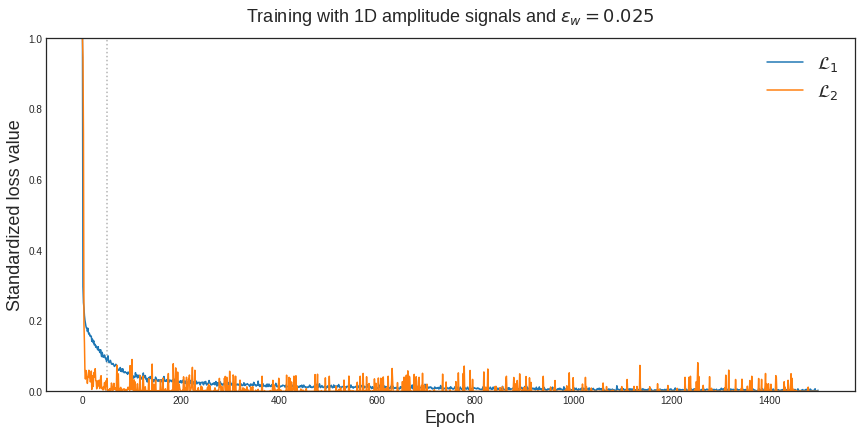

In [6]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 6.5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.3)
plt.title('Training with 1D amplitude signals and $\epsilon_w=0.025$', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend(fontsize=18)

In [7]:

results = []
num_classes = 2
learning_rate = 0.005
samples = 3000
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for batch_size in [256]:
    for hidden_size in [100]:
        for aux_loss_activated in [True]:
            for EPS1 in [0.025]:
                for n in [100000]:
                    for opt in [1]:
                        for t in range(1):
                            train_dataset, test_dataset = ut.load_files(dataset=1)
                            input_size = train_dataset.shape[1]-1
                            train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

                            if n < 50000:
                                train_dataset = ut.down_sampling(train_dataset)
                                train_dataset = train_dataset.sample(n)
                                print(train_dataset)
                            else: 
                                trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                print('shape: ', trainig_dataset_a.shape[0])
                                n2 = n - trainig_dataset_a.shape[0]
                                print('clase no RR Lrae', n2)
                                trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                            


                            train_dataset = ut.sort_columns(train_dataset)
                            test_dataset = ut.sort_columns(test_dataset)
                            #train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                            test_dataset_pred = test_dataset.copy()
                            train_dataset_pred = train_dataset.copy()

                            try:
                                data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='uniform')

                                if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                    samples_prior = samples 
                                else: 
                                    samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0] 
                                
                                data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])

                                train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)

                                train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                print(train_dataset_prior.columns)
                                _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                net = Net(input_size, hidden_size, hidden_size, num_classes)
                                net.cuda()

                                hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)
                            except Exception as e:
                                print(e) 
                                print(str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28243
clase no RR Lrae 71757
uniform
starting
(3000, 1)
(3000, 1)
(3000, 2)
befora concat
phase 1
phase 1.2
phase 1.3
(3000, 61)
phase 1.4
phase 2
phase 3
(6000, 61)
(6000, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmoni

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  106.99659180641174 -- aux loss:  18.182192534208298
training: epoch:  2  loss:  100.72653451561928 -- aux loss:  19.01196387410164
training: epoch:  3  loss:  100.3611852824688 -- aux loss:  18.61301499605179
training: epoch:  4  loss:  100.12311732769012 -- aux loss:  12.871305048465729
training: epoch:  5  loss:  99.9692271053791 -- aux loss:  15.744845598936081
training: epoch:  6  loss:  99.91995176672935 -- aux loss:  11.098214983940125
training: epoch:  7  loss:  99.82132294774055 -- aux loss:  11.242236107587814
training: epoch:  8  loss:  99.77577531337738 -- aux loss:  10.251544028520584
training: epoch:  9  loss:  99.64565670490265 -- aux loss:  9.976031452417374
training: epoch:  10  loss:  99.65933534502983 -- aux loss:  9.483115285634995
the_last_loss:  0.0
running_loss_val:  0.8346872329711914
validating: epoch:  10  loss:  0.8346872329711914
The current loss: 0.8346872329711914
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(4806, 

training: epoch:  67  loss:  98.77191662788391 -- aux loss:  9.335745871067047
training: epoch:  68  loss:  98.78975766897202 -- aux loss:  9.4328253865242
training: epoch:  69  loss:  98.78262183070183 -- aux loss:  9.115215867757797
training: epoch:  70  loss:  98.82201367616653 -- aux loss:  9.292072921991348
the_last_loss:  0.3141535520553589
running_loss_val:  0.8129389882087708
validating: epoch:  70  loss:  0.8129389882087708
The current loss: 0.8129389882087708
the_last_loss: 0.3141535520553589
trigger times: 1
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  71  loss:  98.72217944264412 -- aux loss:  9.43963274359703
training: epoch:  72  loss:  98.76716911792755 -- aux loss:  9.173364520072937
training: epoch:  73 

training: epoch:  131  loss:  98.53498783707619 -- aux loss:  9.084616243839264
training: epoch:  132  loss:  98.53849217295647 -- aux loss:  9.084701478481293
training: epoch:  133  loss:  98.52892461419106 -- aux loss:  9.088108956813812
training: epoch:  134  loss:  98.5664384663105 -- aux loss:  9.085454046726227
training: epoch:  135  loss:  98.54580008983612 -- aux loss:  9.33059048652649
training: epoch:  136  loss:  98.54737004637718 -- aux loss:  9.10456445813179
training: epoch:  137  loss:  98.51477071642876 -- aux loss:  9.085241794586182
training: epoch:  138  loss:  98.51350077986717 -- aux loss:  9.153550952672958
training: epoch:  139  loss:  98.57249417901039 -- aux loss:  9.10490894317627
training: epoch:  140  loss:  98.5563690662384 -- aux loss:  9.110798239707947
the_last_loss:  0.31326591968536377
running_loss_val:  0.4024345874786377
validating: epoch:  140  loss:  0.4024345874786377
The current loss: 0.4024345874786377
the_last_loss: 0.31326591968536377
trigger 

training: epoch:  196  loss:  98.5109880566597 -- aux loss:  9.085876256227493
training: epoch:  197  loss:  98.47928774356842 -- aux loss:  9.08460533618927
training: epoch:  198  loss:  98.5214714705944 -- aux loss:  9.085641771554947
training: epoch:  199  loss:  98.45581114292145 -- aux loss:  9.5833660364151
training: epoch:  200  loss:  98.46886897087097 -- aux loss:  9.085562765598297
the_last_loss:  0.6018602252006531
running_loss_val:  0.9971956014633179
validating: epoch:  200  loss:  0.9971956014633179
The current loss: 0.9971956014633179
the_last_loss: 0.6018602252006531
trigger times: 3
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  201  loss:  98.46326673030853 -- aux loss:  9.105141431093216
training: epoch:

training: epoch:  261  loss:  98.44094562530518 -- aux loss:  9.08622744679451
training: epoch:  262  loss:  98.41526633501053 -- aux loss:  9.089677661657333
training: epoch:  263  loss:  98.40216606855392 -- aux loss:  9.312253147363663
training: epoch:  264  loss:  98.44265320897102 -- aux loss:  9.085725665092468
training: epoch:  265  loss:  98.46062287688255 -- aux loss:  9.277042657136917
training: epoch:  266  loss:  98.40470081567764 -- aux loss:  9.084588050842285
training: epoch:  267  loss:  98.4149599969387 -- aux loss:  9.084587633609772
training: epoch:  268  loss:  98.42827299237251 -- aux loss:  9.084722012281418
training: epoch:  269  loss:  98.41961577534676 -- aux loss:  9.08458861708641
training: epoch:  270  loss:  98.40697583556175 -- aux loss:  9.084711790084839
the_last_loss:  1.1060365438461304
running_loss_val:  0.4871906042098999
validating: epoch:  270  loss:  0.4871906042098999
The current loss: 0.4871906042098999
the_last_loss: 1.1060365438461304
trigger 

training: epoch:  326  loss:  98.39418917894363 -- aux loss:  9.091653317213058
training: epoch:  327  loss:  98.39439177513123 -- aux loss:  9.109014749526978
training: epoch:  328  loss:  98.38954293727875 -- aux loss:  9.093160510063171
training: epoch:  329  loss:  98.41349375247955 -- aux loss:  9.08465701341629
training: epoch:  330  loss:  98.41711211204529 -- aux loss:  9.084588199853897
the_last_loss:  1.0629304647445679
running_loss_val:  1.1872453689575195
validating: epoch:  330  loss:  1.1872453689575195
The current loss: 1.1872453689575195
the_last_loss: 1.0629304647445679
trigger times: 3
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  331  loss:  98.41827231645584 -- aux loss:  9.088055610656738
training: ep

training: epoch:  391  loss:  98.34538874030113 -- aux loss:  9.084790498018265
training: epoch:  392  loss:  98.4114600121975 -- aux loss:  9.088494539260864
training: epoch:  393  loss:  98.3343386054039 -- aux loss:  9.08781224489212
training: epoch:  394  loss:  98.36578458547592 -- aux loss:  9.104394435882568
training: epoch:  395  loss:  98.37400561571121 -- aux loss:  9.086007416248322
training: epoch:  396  loss:  98.4155498445034 -- aux loss:  9.248627692461014
training: epoch:  397  loss:  98.38597223162651 -- aux loss:  9.085024952888489
training: epoch:  398  loss:  98.4002228975296 -- aux loss:  9.084699004888535
training: epoch:  399  loss:  98.34980940818787 -- aux loss:  9.084753721952438
training: epoch:  400  loss:  98.37619563937187 -- aux loss:  9.084641724824905
the_last_loss:  0.3132669925689697
running_loss_val:  0.31326162815093994
validating: epoch:  400  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.3132669925689697
trigger

training: epoch:  456  loss:  98.32016468048096 -- aux loss:  9.556977957487106
training: epoch:  457  loss:  98.39299094676971 -- aux loss:  9.084587663412094
training: epoch:  458  loss:  98.34230673313141 -- aux loss:  9.088587015867233
training: epoch:  459  loss:  98.34727689623833 -- aux loss:  9.08980268239975
training: epoch:  460  loss:  98.32586950063705 -- aux loss:  9.089010655879974
the_last_loss:  0.31326162815093994
running_loss_val:  0.6882615685462952
validating: epoch:  460  loss:  0.6882615685462952
The current loss: 0.6882615685462952
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  461  loss:  98.29190587997437 -- aux loss:  9.084643751382828
training: 

training: epoch:  521  loss:  98.34988051652908 -- aux loss:  9.086287796497345
training: epoch:  522  loss:  98.31741011142731 -- aux loss:  9.086615711450577
training: epoch:  523  loss:  98.30301934480667 -- aux loss:  9.38333448767662
training: epoch:  524  loss:  98.3368047773838 -- aux loss:  9.284206986427307
training: epoch:  525  loss:  98.2969990670681 -- aux loss:  9.1114382147789
training: epoch:  526  loss:  98.30075860023499 -- aux loss:  9.086297631263733
training: epoch:  527  loss:  98.31782376766205 -- aux loss:  9.086552292108536
training: epoch:  528  loss:  98.31447872519493 -- aux loss:  9.383832275867462
training: epoch:  529  loss:  98.29629829525948 -- aux loss:  9.36753761768341
training: epoch:  530  loss:  98.31288486719131 -- aux loss:  9.0852090716362
the_last_loss:  0.550023078918457
running_loss_val:  0.9413767457008362
validating: epoch:  530  loss:  0.9413767457008362
The current loss: 0.9413767457008362
the_last_loss: 0.550023078918457
trigger times: 

training: epoch:  586  loss:  98.36549854278564 -- aux loss:  9.084587216377258
training: epoch:  587  loss:  98.31651812791824 -- aux loss:  9.088381350040436
training: epoch:  588  loss:  98.34587770700455 -- aux loss:  9.084963858127594
training: epoch:  589  loss:  98.30509147047997 -- aux loss:  9.22224846482277
training: epoch:  590  loss:  98.2957011461258 -- aux loss:  9.09841674566269
the_last_loss:  0.9382615685462952
running_loss_val:  0.6882615089416504
validating: epoch:  590  loss:  0.6882615089416504
The current loss: 0.6882615089416504
the_last_loss: 0.9382615685462952
trigger times: 0
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  591  loss:  98.30710759758949 -- aux loss:  9.608286172151566
training: epoc

training: epoch:  651  loss:  98.35990333557129 -- aux loss:  9.084587216377258
training: epoch:  652  loss:  98.3222969174385 -- aux loss:  9.08458724617958
training: epoch:  653  loss:  98.32826548814774 -- aux loss:  9.086071819067001
training: epoch:  654  loss:  98.28445509076118 -- aux loss:  9.084587216377258
training: epoch:  655  loss:  98.29646757245064 -- aux loss:  9.084587216377258
training: epoch:  656  loss:  98.29099747538567 -- aux loss:  9.520530074834824
training: epoch:  657  loss:  98.28895962238312 -- aux loss:  9.085579931735992
training: epoch:  658  loss:  98.3693465590477 -- aux loss:  9.08458724617958
training: epoch:  659  loss:  98.3242954313755 -- aux loss:  9.704045832157135
training: epoch:  660  loss:  98.31828209757805 -- aux loss:  9.084587544202805
the_last_loss:  0.9382615685462952
running_loss_val:  0.31326162815093994
validating: epoch:  660  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.9382615685462952
trigger

training: epoch:  716  loss:  98.29148015379906 -- aux loss:  9.084587216377258
training: epoch:  717  loss:  98.30003750324249 -- aux loss:  9.084587216377258
training: epoch:  718  loss:  98.31487861275673 -- aux loss:  9.084587216377258
training: epoch:  719  loss:  98.28201186656952 -- aux loss:  9.084607541561127
training: epoch:  720  loss:  98.2860896885395 -- aux loss:  9.085199266672134
the_last_loss:  1.028633952140808
running_loss_val:  0.31326162815093994
validating: epoch:  720  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.028633952140808
trigger times: 0
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  721  loss:  98.32248815894127 -- aux loss:  9.677008479833603
training: e

training: epoch:  781  loss:  98.27779787778854 -- aux loss:  9.084588050842285
training: epoch:  782  loss:  98.27422979474068 -- aux loss:  9.084587216377258
training: epoch:  783  loss:  98.28266686201096 -- aux loss:  9.084587216377258
training: epoch:  784  loss:  98.3001501262188 -- aux loss:  9.548393815755844
training: epoch:  785  loss:  98.27605843544006 -- aux loss:  9.084587216377258
training: epoch:  786  loss:  98.28965672850609 -- aux loss:  9.084587216377258
training: epoch:  787  loss:  98.32475000619888 -- aux loss:  9.084963023662567
training: epoch:  788  loss:  98.28689816594124 -- aux loss:  9.084587216377258
training: epoch:  789  loss:  98.31546488404274 -- aux loss:  9.08606418967247
training: epoch:  790  loss:  98.33302855491638 -- aux loss:  9.08458724617958
the_last_loss:  0.34629368782043457
running_loss_val:  0.31326162815093994
validating: epoch:  790  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.34629368782043457
tri

training: epoch:  846  loss:  98.33247882127762 -- aux loss:  9.084587216377258
training: epoch:  847  loss:  98.28008896112442 -- aux loss:  9.084587216377258
training: epoch:  848  loss:  98.33984237909317 -- aux loss:  9.084587216377258
training: epoch:  849  loss:  98.30123874545097 -- aux loss:  9.115247905254364
training: epoch:  850  loss:  98.29747760295868 -- aux loss:  9.085567086935043
the_last_loss:  0.3132619261741638
running_loss_val:  0.31326162815093994
validating: epoch:  850  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.3132619261741638
trigger times: 0
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  851  loss:  98.28858569264412 -- aux loss:  9.08458724617958
training:

training: epoch:  911  loss:  98.30164098739624 -- aux loss:  9.086075127124786
training: epoch:  912  loss:  98.2854251563549 -- aux loss:  9.086071014404297
training: epoch:  913  loss:  98.28078699111938 -- aux loss:  9.08458736538887
training: epoch:  914  loss:  98.27973517775536 -- aux loss:  9.08911645412445
training: epoch:  915  loss:  98.27311500906944 -- aux loss:  9.137938022613525
training: epoch:  916  loss:  98.29199576377869 -- aux loss:  9.679588049650192
training: epoch:  917  loss:  98.30886182188988 -- aux loss:  9.086070984601974
training: epoch:  918  loss:  98.2989411354065 -- aux loss:  9.084587216377258
training: epoch:  919  loss:  98.28742131590843 -- aux loss:  9.161116570234299
training: epoch:  920  loss:  98.32802113890648 -- aux loss:  9.084587216377258
the_last_loss:  0.6882615089416504
running_loss_val:  1.0632623434066772
validating: epoch:  920  loss:  1.0632623434066772
The current loss: 1.0632623434066772
the_last_loss: 0.6882615089416504
trigger t

training: epoch:  976  loss:  98.29225981235504 -- aux loss:  9.084587216377258
training: epoch:  977  loss:  98.28443387150764 -- aux loss:  9.084589421749115
training: epoch:  978  loss:  98.2777329981327 -- aux loss:  9.084587216377258
training: epoch:  979  loss:  98.2854984998703 -- aux loss:  9.084587216377258
training: epoch:  980  loss:  98.3072640299797 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.3607329726219177
validating: epoch:  980  loss:  0.3607329726219177
The current loss: 0.3607329726219177
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  981  loss:  98.29271325469017 -- aux loss:  9.084587216377258
training: ep

training: epoch:  1040  loss:  98.30955255031586 -- aux loss:  9.085035979747772
the_last_loss:  0.31326553225517273
running_loss_val:  0.31326162815093994
validating: epoch:  1040  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.31326553225517273
trigger times: 0
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  1041  loss:  98.28144550323486 -- aux loss:  9.08533838391304
training: epoch:  1042  loss:  98.30613821744919 -- aux loss:  9.087750732898712
training: epoch:  1043  loss:  98.30508908629417 -- aux loss:  9.260274708271027
training: epoch:  1044  loss:  98.28207051753998 -- aux loss:  9.086144149303436
training: epoch:  1045  loss:  98.28321245312691 -- aux loss:  9.08458760380745
t

training: epoch:  1101  loss:  98.27325040102005 -- aux loss:  9.084587216377258
training: epoch:  1102  loss:  98.29739958047867 -- aux loss:  9.205719619989395
training: epoch:  1103  loss:  98.30284342169762 -- aux loss:  9.084587424993515
training: epoch:  1104  loss:  98.29511752724648 -- aux loss:  9.086631059646606
training: epoch:  1105  loss:  98.28606897592545 -- aux loss:  9.08458799123764
training: epoch:  1106  loss:  98.26747772097588 -- aux loss:  9.281111478805542
training: epoch:  1107  loss:  98.28717827796936 -- aux loss:  9.171160399913788
training: epoch:  1108  loss:  98.28893527388573 -- aux loss:  9.088493466377258
training: epoch:  1109  loss:  98.29645711183548 -- aux loss:  9.084587216377258
training: epoch:  1110  loss:  98.2858656346798 -- aux loss:  9.121828347444534
the_last_loss:  1.026989221572876
running_loss_val:  1.167555570602417
validating: epoch:  1110  loss:  1.167555570602417
The current loss: 1.167555570602417
the_last_loss: 1.026989221572876
t

training: epoch:  1165  loss:  98.28634643554688 -- aux loss:  9.084587216377258
training: epoch:  1166  loss:  98.27156609296799 -- aux loss:  9.084589719772339
training: epoch:  1167  loss:  98.29682391881943 -- aux loss:  9.084587216377258
training: epoch:  1168  loss:  98.28933328390121 -- aux loss:  9.084587216377258
training: epoch:  1169  loss:  98.29782176017761 -- aux loss:  9.279205918312073
training: epoch:  1170  loss:  98.28685575723648 -- aux loss:  9.086071133613586
the_last_loss:  0.5632616281509399
running_loss_val:  0.4874674677848816
validating: epoch:  1170  loss:  0.4874674677848816
The current loss: 0.4874674677848816
the_last_loss: 0.5632616281509399
trigger times: 0
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
trai

training: epoch:  1229  loss:  98.2634861767292 -- aux loss:  9.087447345256805
training: epoch:  1230  loss:  98.28693708777428 -- aux loss:  9.088493317365646
the_last_loss:  0.993541419506073
running_loss_val:  0.31326162815093994
validating: epoch:  1230  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.993541419506073
trigger times: 0
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  1231  loss:  98.32395350933075 -- aux loss:  9.086071163415909
training: epoch:  1232  loss:  98.28066372871399 -- aux loss:  9.150801599025726
training: epoch:  1233  loss:  98.27009868621826 -- aux loss:  9.084587216377258
training: epoch:  1234  loss:  98.27859222888947 -- aux loss:  9.087957918643951
trai

training: epoch:  1291  loss:  98.28523379564285 -- aux loss:  9.16414549946785
training: epoch:  1292  loss:  98.28891381621361 -- aux loss:  9.084587275981903
training: epoch:  1293  loss:  98.28755688667297 -- aux loss:  9.086089313030243
training: epoch:  1294  loss:  98.27560782432556 -- aux loss:  9.08755511045456
training: epoch:  1295  loss:  98.29744702577591 -- aux loss:  9.084587216377258
training: epoch:  1296  loss:  98.27156898379326 -- aux loss:  9.086071193218231
training: epoch:  1297  loss:  98.28107634186745 -- aux loss:  9.085312008857727
training: epoch:  1298  loss:  98.31009891629219 -- aux loss:  9.084587216377258
training: epoch:  1299  loss:  98.31677368283272 -- aux loss:  9.108330607414246
training: epoch:  1300  loss:  98.28785744309425 -- aux loss:  9.08458724617958
the_last_loss:  0.31326162815093994
running_loss_val:  1.06326162815094
validating: epoch:  1300  loss:  1.06326162815094
The current loss: 1.06326162815094
the_last_loss: 0.31326162815093994
t

training: epoch:  1355  loss:  98.27591028809547 -- aux loss:  9.084587216377258
training: epoch:  1356  loss:  98.29979220032692 -- aux loss:  9.086070328950882
training: epoch:  1357  loss:  98.27240312099457 -- aux loss:  9.084587216377258
training: epoch:  1358  loss:  98.3065710067749 -- aux loss:  9.11698591709137
training: epoch:  1359  loss:  98.26491472125053 -- aux loss:  9.084587216377258
training: epoch:  1360  loss:  98.27179858088493 -- aux loss:  9.084599524736404
the_last_loss:  1.31326162815094
running_loss_val:  0.31326162815093994
validating: epoch:  1360  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.31326162815094
trigger times: 0
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
trainin

training: epoch:  1419  loss:  98.26152992248535 -- aux loss:  9.084587216377258
training: epoch:  1420  loss:  98.2705008983612 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  1420  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.31326162815093994
trigger times: 2
sum mask2 - L1:  tensor(4806, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(151, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1194, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(49, device='cuda:0')
training: epoch:  1421  loss:  98.2597531080246 -- aux loss:  9.084587216377258
training: epoch:  1422  loss:  98.27832689881325 -- aux loss:  9.087564587593079
training: epoch:  1423  loss:  98.28159457445145 -- aux loss:  9.086071610450745
training: epoch:  1424  loss:  98.26438996195793 -- aux loss:  9.13243967294693
tr

training: epoch:  1481  loss:  98.29067724943161 -- aux loss:  9.08458724617958
training: epoch:  1482  loss:  98.26279798150063 -- aux loss:  9.084587216377258
training: epoch:  1483  loss:  98.29438373446465 -- aux loss:  9.088493466377258
training: epoch:  1484  loss:  98.26419952511787 -- aux loss:  9.084587216377258
training: epoch:  1485  loss:  98.26872384548187 -- aux loss:  9.088477194309235
training: epoch:  1486  loss:  98.26766330003738 -- aux loss:  9.084587216377258
training: epoch:  1487  loss:  98.28596597909927 -- aux loss:  9.084587216377258
training: epoch:  1488  loss:  98.26761275529861 -- aux loss:  9.084587216377258
training: epoch:  1489  loss:  98.27121311426163 -- aux loss:  9.1306853890419
training: epoch:  1490  loss:  98.26017010211945 -- aux loss:  9.084587216377258
the_last_loss:  0.5632615685462952
running_loss_val:  0.688258171081543
validating: epoch:  1490  loss:  0.688258171081543
The current loss: 0.688258171081543
the_last_loss: 0.5632615685462952


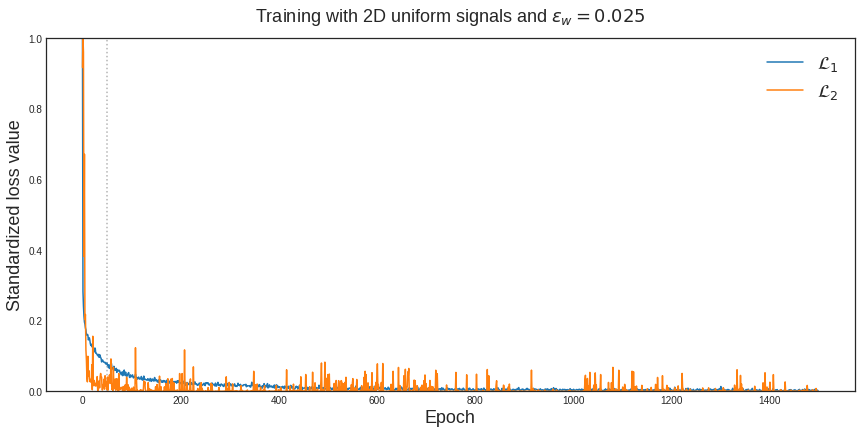

In [8]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 6.5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.3)
plt.title('Training with 2D uniform signals and $\epsilon_w=0.025$', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend(fontsize=18)